In [1]:
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import spatial
from scipy.stats import fisher_exact, chi2_contingency

# How to determine half-life diversity

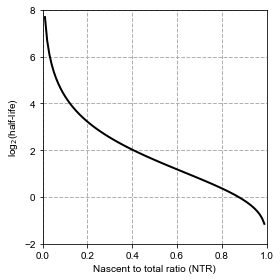

In [41]:
xs = np.arange(0, 1, 0.01)[1:]
ys = np.array([-3/np.log2(1 - x) for x in xs])
ys1 = np.log2(ys)
ys2 = np.arange(-2, 9)

plt.figure(figsize=(4, 4))
plt.plot(xs, ys1, color="black", lw=2)
plt.xlabel("Nascent to total ratio (NTR)")
plt.ylabel("log$_2$(half-life)")
plt.xlim(0, 1)
plt.ylim(-2, 8)
# plt.yticks(ys2, [2**int(y) for y in ys2])
plt.grid(lw=1, ls="--")
plt.tight_layout()
plt.savefig("ntr_halflife.png", dpi=300)

In [50]:
m = [[80, 20], [40, 30]]
print(fisher_exact(m))
print(chi2_contingency(m))

(3.0, 0.0019404959344596772)
(9.290196428571425, 0.002303834556318016, 1, array([[70.58823529, 29.41176471],
       [49.41176471, 20.58823529]]))


In [57]:
ntr1 = 20 / (80 + 20)
T1 = -3 / np.log2(1 - ntr1)
print(ntr1, T1)

ntr2 = 30 / (40 + 30)
T2 = -3 / np.log2(1 - ntr2)
print(ntr2, T2)

np.log2(T2) - np.log2(T1)

0.2 9.318851158516171
0.42857142857142855 3.71583787754


-1.3264645501722656

# Correlation of change of synthesis rate, decay rate and expression level

    Synthesis rate vs. TPM
    Decay rate vs. TPM

## 1. Synthesis rate vs. expression level

/home/chenzonggui/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chenzonggui/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chenzonggui/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chenzonggui/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chenzonggui/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


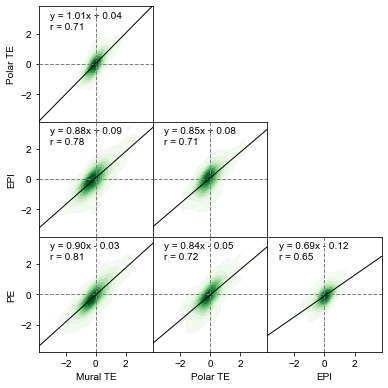

In [2]:
cts = ["muralTE", "polarTE", "EPI", "PE"]
names = ["Mural TE", "Polar TE", "EPI", "PE"]

fig, axs = plt.subplots(len(cts) - 1, len(cts) - 1, figsize=(5.5, 5.5), gridspec_kw=dict(hspace=0, wspace=0))
for i in range(len(cts)):
    for j in range(len(cts) - 1):
        if i == 0:
            continue
        ax = axs[i-1][j]
        if i <= j:
            ax.set_visible(False)
            continue
        plt.sca(ax)
        ct1, ct2 = cts[i], cts[j]
        name1, name2 = names[i], names[j]
        path1 = "../08_blastocyst/results/halflife/%s_transcripts.transcript_name.tsv" % ct1
        path2 = "../08_blastocyst/results/halflife/%s_transcripts.transcript_name.tsv" % ct2
        m1 = pd.read_csv(path1, sep="\t", index_col=0)
        m2 = pd.read_csv(path2, sep="\t", index_col=0)
        m = m1.merge(m2, left_index=True, right_index=True, suffixes=[".CT1", ".CT2"])
        m = m[(m["TPM.CT1"] >= 100) & (m["TPM.CT2"] >= 100)]
        vmax = 3.8
        xs = np.log2(m["TPM.CT2"] / m["TPM.CT1"])
        ys = np.log2(m["K.CT2"] / m["K.CT1"])
        flags = (xs > -vmax) & (xs < vmax) & (ys > -vmax) & (ys < vmax)
        xs, ys = xs[flags], ys[flags]
        a, b = np.polyfit(xs, ys, 1)
        r = np.corrcoef(xs, ys)[0][1]
        plt.text(-vmax + 2 * vmax * 0.1, -vmax + 2 * vmax * 0.9, "y = %.2fx %s %.2f" % (a, "+" if b >= 0 else "-", abs(b)))
        plt.text(-vmax + 2 * vmax * 0.1, -vmax + 2 * vmax * 0.8, "r = %.2f" % r)
        sns.kdeplot(x=xs, y=ys, fill=True, cmap='Greens', zorder=10)
        plt.axvline(0, lw=1, ls="--", color="grey", zorder=20)
        plt.axhline(0, lw=1, ls="--", color="grey", zorder=20)
        plt.plot([-vmax, vmax], [a * -vmax + b, a * vmax + b], lw=1, color="black", zorder=30)
        if j == 0:
            plt.yticks([-2, 0, 2])
            # plt.ylabel("%s\nlog$_2$($\Delta$sythesis rate)" % names[cts.index(ct1)])
            plt.ylabel(name1)
        else:
            plt.yticks([])
        if i == len(cts) - 1:
            plt.xticks([-2, 0, 2])
            plt.xlabel(name2)
            # plt.xlabel("log$_2$($\Delta$TPM)\n%s" % names[cts.index(ct2)])
        else:
            plt.xticks([])
        plt.xlim(-vmax, vmax)
        plt.ylim(-vmax, vmax)
        
plt.tight_layout()
plt.savefig("figures/change_of_tpm_sythesis_rate.pdf", dpi=300)

## 2. Decay rate vs. expression level

/home/chenzonggui/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chenzonggui/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chenzonggui/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chenzonggui/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/chenzonggui/miniconda3/envs/py36/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


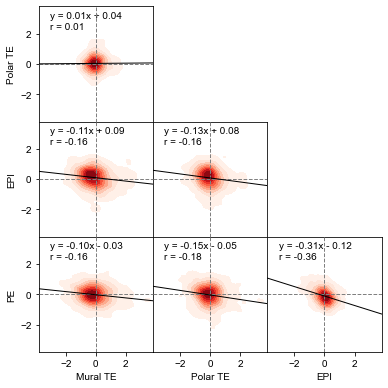

In [3]:
fig, axs = plt.subplots(len(cts) - 1, len(cts) - 1, figsize=(5.5, 5.5), gridspec_kw=dict(hspace=0, wspace=0))
for i in range(len(cts)):
    for j in range(len(cts) - 1):
        if i == 0:
            continue
        ax = axs[i-1][j]
        if i <= j:
            ax.set_visible(False)
            continue
        plt.sca(ax)
        ct1, ct2 = cts[i], cts[j]
        name1, name2 = names[i], names[j]
        path1 = "../08_blastocyst/results/halflife/%s_transcripts.transcript_name.tsv" % ct1
        path2 = "../08_blastocyst/results/halflife/%s_transcripts.transcript_name.tsv" % ct2
        m1 = pd.read_csv(path1, sep="\t", index_col=0)
        m2 = pd.read_csv(path2, sep="\t", index_col=0)
        m = m1.merge(m2, left_index=True, right_index=True, suffixes=[".CT1", ".CT2"])
        m = m[(m["TPM.CT1"] >= 100) & (m["TPM.CT2"] >= 100)]
        vmax = 3.8
        xs = np.log2(m["TPM.CT2"] / m["TPM.CT1"])
        ys = np.log2(m["D.CT2"] / m["D.CT1"])
        flags = (xs > -vmax) & (xs < vmax) & (ys > -vmax) & (ys < vmax)
        xs, ys = xs[flags], ys[flags]
        a, b = np.polyfit(xs, ys, 1)
        r = np.corrcoef(xs, ys)[0][1]
        plt.text(-vmax + 2 * vmax * 0.1, -vmax + 2 * vmax * 0.9, "y = %.2fx %s %.2f" % (a, "+" if b >= 0 else "-", abs(b)))
        plt.text(-vmax + 2 * vmax * 0.1, -vmax + 2 * vmax * 0.8, "r = %.2f" % r)
        # plt.scatter(xs, ys, marker=".", color="grey")
        sns.kdeplot(x=xs, y=ys, fill=True, cmap='Reds', zorder=10)
        plt.axvline(0, lw=1, ls="--", color="grey", zorder=20)
        plt.axhline(0, lw=1, ls="--", color="grey", zorder=20)
        plt.plot([-vmax, vmax], [a * -vmax + b, a * vmax + b], lw=1, color="black", zorder=30)
        if j == 0:
            # plt.ylabel("%s\nlog$_2$($\Delta$decay rate)" % name1)
            plt.yticks([-2, 0, 2])
            plt.ylabel(name1)
        else:
            plt.yticks([])
        if i == len(cts) - 1:
            plt.xticks([-2, 0, 2])
            plt.xlabel(name2)
            # plt.xlabel("log$_2$($\Delta$TPM)\n%s" % name2)
        else:
            plt.xticks([])
        plt.xlim(-vmax, vmax)
        plt.ylim(-vmax, vmax)
        
plt.tight_layout()
plt.savefig("figures/change_of_tpm_decay_rate.pdf", dpi=300)

# Regulate strategy of isoforms

In [6]:
# cts = ["TE-1", "TE-2", "muralTE", "poralTE", "ICM-1", "ICM-2", "EPI", "PE"]
cts = ["EPI", "PE", "muralTE", "polarTE"]
array = []
for ct in cts:
    path = "../08_blastocyst/results/halflife/%s_transcripts.transcript_name.tsv" % ct
    m = pd.read_csv(path, sep="\t", index_col=0)
    m.columns = ["%s.%s" % (c, ct) for c in m.columns]
    array.append(m)

In [7]:
m = pd.concat(array, axis=1)

tmp = m[["TPM.%s" % ct for ct in cts]].fillna(0)
tmp = tmp[(tmp.min(axis=1) > 300) & ((tmp.std(axis=1) / tmp.mean(axis=1)) > 0.2)]
m = m.loc[tmp.index]
print(len(m))

148


In [8]:
# raw
d1 = m[["K.%s" % ct for ct in cts]].fillna(0)
d2 = m[["D.%s" % ct for ct in cts]].fillna(0)
d3 = m[["TPM.%s" % ct for ct in cts]].fillna(0)
d_raw = pd.concat([d1, d2, d3], axis=1)

In [25]:
# normalized, log2

d = m[["K.%s" % ct for ct in cts]].fillna(0)
d = d.divide(d[d.columns[0]], axis=0)
d = np.log2(d)
d1 = d

d = m[["D.%s" % ct for ct in cts]].fillna(0)
d = d.divide(d[d.columns[0]], axis=0)
d = np.log2(d)
d2 = d

d = m[["TPM.%s" % ct for ct in cts]].fillna(0)
d = d.divide(d[d.columns[0]], axis=0)
d = np.log2(d)
d3 = d

flags = ((~np.isfinite(d1)).sum(axis=1) == 0) & ((~np.isfinite(d2)).sum(axis=1) == 0) & ((~np.isfinite(d3)).sum(axis=1) == 0)
d1, d2, d3 = d1[flags], d2[flags], d3[flags]

d = pd.concat([d1, d2, d3], axis=1)
print(len(d))

similars = []
tname2similars = dict()
row_colors = []
for tname, vs1, vs2 in zip(d1.index, d1.values, d2.values):
    similar = 1 - spatial.distance.cosine(vs1, vs2)
    tname2similars[tname] = similar
    similars.append(similar)
    if similar >= 0.5:
        color = (1, 0, 0, similar)
        color = "C2"
    elif similar < -0.5:
        color = (0, 0, 1, abs(similar))
        color = "C4"
    else:
        color = "lightgrey"
    row_colors.append(color)
col_colors = ["#86B414", "#00BFC4", "#CD969B", "#839600"] * 3

148


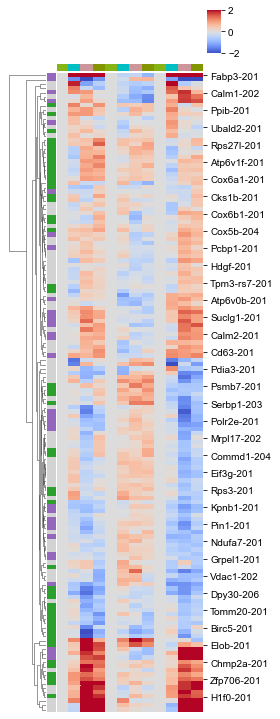

In [26]:
tmp = d.copy()
tmp.columns = [None for c in tmp.columns]
ret = sns.clustermap(tmp, col_cluster=False, 
                     row_colors=row_colors, 
                     col_colors=col_colors,
                     dendrogram_ratio=[0.2, 0.07], 
                     colors_ratio=[0.05, 0.01],
                     cbar_pos=(0.73, 0.93, 0.05, 0.06),
                     lw=0,
                     cmap="coolwarm", vmin=-2, vmax=2, figsize=(4, 10))
ret.ax_heatmap.set_xticks([])
ret.fig.savefig("figures/regulatory_strategy.clustermap.pdf", dpi=300)

In [89]:
tmp = d.copy()
tmp["Similar"] = similars
tmp = tmp.loc[ret.data2d.index]

In [90]:
tmp.index.name = "TranscriptName"
tmp.to_csv("results/candidate_transcripts.tsv", sep="\t")

In [91]:
def parse_gene_name(tname):
    if "novel" in tname:
        return tname.split("novel")[0][:-1]
    else:
        return tname[:-4]
tmp["GeneName"] = list(map(parse_gene_name, tmp.index))

In [92]:
for gname, tmp1 in tmp.groupby(by="GeneName"):
    if len(tmp1) > 1:
        print(len(tmp1), gname, sep="\t")
        break

3	Serbp1


In [38]:
tmp1

,K.EPI,K.PE,K.muralTE,K.poralTE,D.EPI,D.PE,D.muralTE,D.poralTE,TPM.EPI,TPM.PE,TPM.muralTE,TPM.poralTE,Similar,GeneName
Serbp1-211,0.0,0.727488,-0.508624,0.435501,0.0,1.066304,0.831712,1.221164,0.0,-0.338817,-1.340336,-0.785663,0.490971,Serbp1
Serbp1-203,0.0,0.082279,-0.097095,0.485025,0.0,0.465396,1.264155,1.266993,0.0,-0.383117,-1.361251,-0.781968,0.571613,Serbp1
Serbp1-201,0.0,-0.444510,-0.832433,-0.630102,0.0,-0.011973,0.157618,0.120099,0.0,-0.432537,-0.990052,-0.750201,-0.894771,Serbp1


In [11]:
print(tmp.sort_values(by="Similar").head(5).index)
print(tmp.sort_values(by="Similar").tail(5).index)
print(tmp[abs(tmp["Similar"]) < 0.1].head(3).index)

Index(['Rtraf-201', 'Tceal9-201', 'Tuba1b-201', 'Pfdn1-201', 'Atp1a1-201'], dtype='object', name='TranscriptName')
Index(['Erh-201', 'Siva1-201', 'Arpc3-202', 'Atp6v1f-201', 'Dynll1-201'], dtype='object', name='TranscriptName')
Index(['Cst3-201', 'Txn1-201', 'Atp5pb-201'], dtype='object', name='TranscriptName')


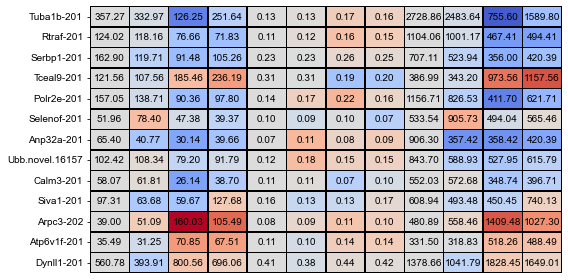

In [12]:
representives = ['Tuba1b-201', 'Rtraf-201', 'Serbp1-201', 'Tceal9-201', 'Polr2e-201',
                 'Selenof-201', 'Anp32a-201', 'Ubb.novel.16157',
                 'Calm3-201', 'Siva1-201', 'Arpc3-202', 'Atp6v1f-201', 'Dynll1-201'
                ]

tmp1 = d.loc[representives]
tmp2 = d_raw.loc[representives]

plt.figure(figsize=(8, 4))
ret = sns.heatmap(tmp1, cmap="coolwarm", vmin=-2, vmax=2, 
    linewidths=0.5, linecolor="black", cbar=None)

for x in np.arange(len(tmp2.columns)):
    for y in np.arange(len(tmp2)):
        v = tmp2.values[y][x]
        plt.text(x + 0.5, y + 0.5, "%.2f" % v, ha="center", va="center")
plt.xticks([])
plt.tight_layout()
plt.savefig("figures/regulatory_strategy.clustermap.genes.pdf", dpi=300)

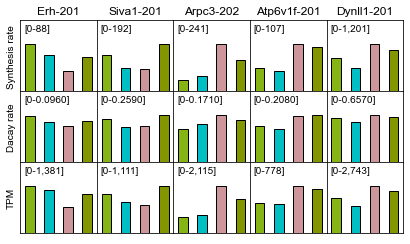

In [63]:
# Index(['Rtraf-201', 'Tceal9-201', 'Tuba1b-201', 'Pfdn1-201', 'Atp1a1-201'], dtype='object', name='TranscriptName')
# Index(['Erh-201', 'Siva1-201', 'Arpc3-202', 'Atp6v1f-201', 'Dynll1-201'], dtype='object', name='TranscriptName')
# Index(['Cst3-201', 'Txn1-201', 'Atp5pb-201'], dtype='object', name='TranscriptName')

representives = [
    # 'Rtraf-201', 'Tceal9-201', 'Tuba1b-201', 'Pfdn1-201', 'Atp1a1-201',
    'Erh-201', 'Siva1-201', 'Arpc3-202', 'Atp6v1f-201', 'Dynll1-201',
    ]

tmp1 = d.loc[representives]
tmp2 = d_raw.loc[representives]

fig, axs = plt.subplots(3, len(representives), figsize=(5.8, 3.5),
                        gridspec_kw=dict(wspace=0, hspace=0))
for i in range(3):
    for j in range(len(tmp2)):
        ax = axs[i][j]
        plt.sca(ax)
        ys = tmp2.iloc[j][i*4:(i+1)*4]
        xs = np.arange(len(ys))
        plt.bar(xs, ys, width=0.5, edgecolor="black", color=["#86B414", "#00BFC4", "#CD969B", "#839600"])
        plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
        ylim = max(ys) * 1.5
        if i != 1:
            ylim = int(ylim) + 1
            plt.ylim(0, ylim)
            plt.text(-0.3, ylim * 0.85, "[0-%s]" % format(ylim, ","))
        else:
            ylim = (int(ylim * 1000) + 1) / 1000
            plt.ylim(0, ylim)
            plt.text(-0.3, ylim * 0.85, "[0-%.4f]" % ylim)
        plt.xticks([])
        plt.yticks([])
        if j == 0:
            if i == 0:
                plt.ylabel("Synthesis rate")
            elif i == 1:
                plt.ylabel("Dacay rate")
            else:
                plt.ylabel("TPM")
        if i == 0:
            plt.title(representives[j], rotation=0)
plt.tight_layout()
# plt.savefig("figures/synthesis_decay_tpm.genes.pdf", dpi=300)

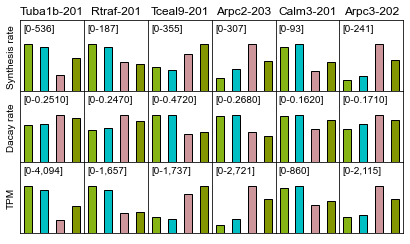

In [66]:
representives = ['Tuba1b-201', 'Rtraf-201', 'Tceal9-201', 'Arpc2-203',
                 'Calm3-201', 'Arpc3-202'
                ]

tmp1 = d.loc[representives]
tmp2 = d_raw.loc[representives]

fig, axs = plt.subplots(3, len(representives), figsize=(5.8, 3.5),
                        gridspec_kw=dict(wspace=0, hspace=0))
for i in range(3):
    for j in range(len(tmp2)):
        ax = axs[i][j]
        plt.sca(ax)
        ys = tmp2.iloc[j][i*4:(i+1)*4]
        xs = np.arange(len(ys))
        plt.bar(xs, ys, width=0.5, edgecolor="black", color=["#86B414", "#00BFC4", "#CD969B", "#839600"])
        plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
        ylim = max(ys) * 1.5
        if i != 1:
            ylim = int(ylim) + 1
            plt.ylim(0, ylim)
            plt.text(-0.3, ylim * 0.85, "[0-%s]" % format(ylim, ","))
        else:
            ylim = (int(ylim * 1000) + 1) / 1000
            plt.ylim(0, ylim)
            plt.text(-0.3, ylim * 0.85, "[0-%.4f]" % ylim)
        plt.xticks([])
        plt.yticks([])
        if j == 0:
            if i == 0:
                plt.ylabel("Synthesis rate")
            elif i == 1:
                plt.ylabel("Dacay rate")
            else:
                plt.ylabel("TPM")
        if i == 0:
            plt.title(representives[j], rotation=0)
plt.tight_layout()
plt.savefig("figures/synthesis_decay_tpm.genes.pdf", dpi=300)

In [101]:
markers = pd.read_csv("../08_embryo/results/seurat_genes/markers.csv", index_col=0)
pval = 0.0001
fc = np.log2(1.5)
# print(fc)
genes1 = set(markers[(markers["cluster"] == "EPI") & (markers["p_val_adj"] <= pval) & (markers["avg_log2FC"] > fc)]["gene"])
genes2 = set(markers[(markers["cluster"] == "PE") & (markers["p_val_adj"] <= pval) & (markers["avg_log2FC"] > fc)]["gene"])
genes3 = set(markers[(markers["cluster"] == "TE-3") & (markers["p_val_adj"] <= pval) & (markers["avg_log2FC"] > fc)]["gene"])
print(len(genes1), len(genes2), len(genes3))

227 226 298


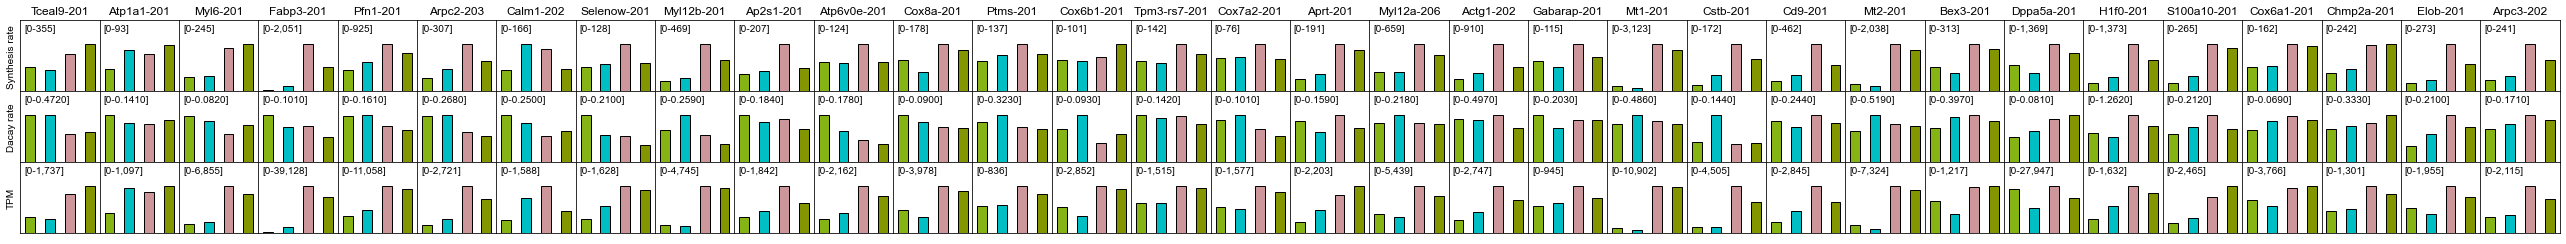

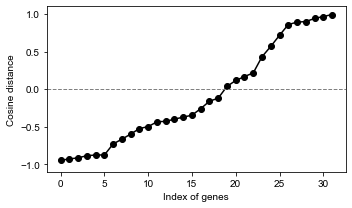

In [130]:
tmp1 = d[[g.split("-")[0] in genes3 for g in d.index]]
representives = tmp1.index
representives = list(sorted(representives, key=lambda x: tname2similars[x]))
tmp1 = d.loc[representives]
tmp2 = d_raw.loc[representives]


fig, axs = plt.subplots(3, len(representives), figsize=((len(representives) + 0.5) * 1.1, 3.5),
                        gridspec_kw=dict(wspace=0, hspace=0))
for i in range(3):
    for j in range(len(tmp2)):
        ax = axs[i][j]
        plt.sca(ax)
        ys = tmp2.iloc[j][i*4:(i+1)*4]
        xs = np.arange(len(ys))
        plt.bar(xs, ys, width=0.5, edgecolor="black", color=["#86B414", "#00BFC4", "#CD969B", "#839600"])
        plt.xlim(min(xs) - 0.5, max(xs) + 0.5)
        ylim = max(ys) * 1.5
        if i != 1:
            ylim = int(ylim) + 1
            plt.ylim(0, ylim)
            plt.text(-0.3, ylim * 0.85, "[0-%s]" % format(ylim, ","))
        else:
            ylim = (int(ylim * 1000) + 1) / 1000
            plt.ylim(0, ylim)
            plt.text(-0.3, ylim * 0.85, "[0-%.4f]" % ylim)
        plt.xticks([])
        plt.yticks([])
        if j == 0:
            if i == 0:
                plt.ylabel("Synthesis rate")
            elif i == 1:
                plt.ylabel("Dacay rate")
            else:
                plt.ylabel("TPM")
        if i == 0:
            plt.title(representives[j], rotation=0)
plt.tight_layout()
# plt.savefig("figures/synthesis_decay_tpm.genes.pdf", dpi=300)

vs = [tname2similars[tname] for tname in representives]
vs.sort()
plt.figure(figsize=(5, 3))
plt.plot(vs, marker="o", color="black")
plt.axhline(0, lw=1, ls='--', color="grey")
plt.xlabel("Index of genes")
plt.ylabel("Cosine distance")
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()

# Gene clusters

In [131]:
markers = pd.read_csv("../08_embryo/results/seurat_genes/markers.csv", index_col=0)
markers.head()

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
Mgarp,4.857126e-97,1.276979,0.846,0.287,1.047973e-92,ICM-2,Mgarp
Fabp5,8.810004e-90,1.618060,0.927,0.539,1.900846e-85,ICM-2,Fabp5
Rnf130,1.420222e-86,1.252845,0.796,0.292,3.064271e-82,ICM-2,Rnf130
Khdc3,5.282391e-80,1.050755,0.997,0.862,1.139729e-75,ICM-2,Khdc3
Fbp2,1.450647e-78,1.128914,0.986,0.676,3.129917e-74,ICM-2,Fbp2


In [132]:
cts = ["EPI", "PE", "muralTE", "poralTE"]
array = []
for ct in cts:
    path = "../08_embryo/results/halflife/%s_genes.gene_name.tsv" % ct
    m = pd.read_csv(path, sep="\t", index_col=0)
    m.columns = ["%s.%s" % (c, ct) for c in m.columns]
    array.append(m)
m = pd.concat(array, axis=1)
tmp = m[["TPM.%s" % ct for ct in cts]].fillna(0)
tmp = tmp[(tmp.min(axis=1) > 300) & ((tmp.std(axis=1) / tmp.mean(axis=1)) > 0.2)]
m = m.loc[tmp.index]
print(len(m))

134


In [136]:
pval = 0.0001
fc = np.log2(1.2)
print(fc)
genes1 = set(markers[(markers["cluster"] == "EPI") & (markers["p_val_adj"] <= pval) & (markers["avg_log2FC"] > fc)]["gene"])
genes2 = set(markers[(markers["cluster"] == "PE") & (markers["p_val_adj"] <= pval) & (markers["avg_log2FC"] > fc)]["gene"])
genes3 = set(markers[(markers["cluster"] == "TE-3") & (markers["p_val_adj"] <= pval) & (markers["avg_log2FC"] > fc)]["gene"])
genes4 = genes1 | genes2 | genes3
print(len(genes1), len(genes2), len(genes3), len(genes4))

0.2630344058337938
624 447 661 1622


134


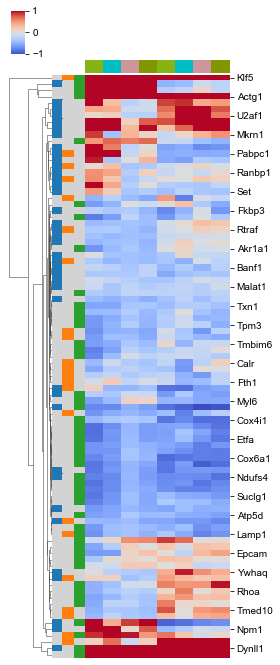

In [151]:
m1 = m[[
    "TPM.EPI", "TPM.PE", "TPM.muralTE", "TPM.poralTE",
    "K.EPI", "K.PE", "K.muralTE", "K.poralTE",
    "D.EPI", "D.PE", "D.muralTE", "D.poralTE",
]]

m2 = m[[
    # "TPM.EPI", "TPM.PE", "TPM.muralTE", "TPM.poralTE",
    "K.EPI", "K.PE", "K.muralTE", "K.poralTE",
    "D.EPI", "D.PE", "D.muralTE", "D.poralTE",
]]

m2 = m2[(~np.isfinite(m2)).sum(axis=1) == 0]
print(len(m2))

# blacklist = ["Klf5", "Actb", "Ubc", "Actg1", 'Coil', 'Cct6a', 'Nop58', 'Ube2c', 'Dnaja1', 'Hnrnpf', 'Serbp1', 'Cox8a', 'Cox6a1']
# m2 = m2[[g not in blacklist for g in m2.index]]
# print(len(m2))

m2 = m2[[g in genes4 for g in m2.index]]

tmp = defaultdict(list)
for g in m2.index:
    k = (g in genes1, g in genes2, g in genes2)
    tmp[k].append(g)
array = []
for k, v in tmp.items():
    array.append(m2.loc[v])
m2 = pd.concat(array)

colors1 = ["C0" if g in genes1 else "lightgrey" for g in m2.index]
colors2 = ["C1" if g in genes2 else "lightgrey" for g in m2.index]
colors3 = ["C2" if g in genes3 else "lightgrey" for g in m2.index]

col_colors = ["#86B414", "#00BFC4", "#CD969B", "#839600"] * 2
ret = sns.clustermap(m2, z_score=1, figsize=(4, 10), col_cluster=False, row_cluster=True, col_colors=col_colors,
                     colors_ratio=[0.05, 0.02],
                     cmap="coolwarm", vmin=-1, vmax=1, dendrogram_ratio=[0.2, 0.07], cbar_pos=(0.05, 0.93, 0.05, 0.06),
                     row_colors=[colors1, colors2, colors3])
ret.ax_heatmap.set_xticks([])
ret.fig.savefig("figures/cluster_genes_by_kinetics_parameters.clustermap.pdf", dpi=300)

In [152]:
ret.data2d.index

Index(['Klf5', 'Ftl1', 'Actb', 'Actg1', 'H2az1', 'Hnrnpu', 'U2af1', 'Eif4ebp1',
       'Serbp1', 'Mkrn1', 'Pfn1', 'Ybx1', 'Pabpc1', 'Gpx1', 'Hmgn1', 'Ranbp1',
       'Tuba1b', 'Prdx1', 'Set', 'Ctsl', 'Myl12b', 'Fkbp3', 'Elob', 'Pcbp2',
       'Rtraf', 'Hspe1', 'Ndufv2', 'Akr1a1', 'Anp32a', 'Park7', 'Banf1',
       'Rps10', 'Ywhae', 'Malat1', 'Slc25a3', 'Bcas2', 'Txn1', 'Gpx4',
       'Atp5g1', 'Tpm3', 'Canx', 'Selenof', 'Tmbim6', 'Capzb', 'Arpc1b',
       'Calr', 'Ppib', 'Bsg', 'Fth1', 'Apoe', 'Cox5a', 'Myl6', 'Cox6c',
       'Pdia3', 'Cox4i1', 'Cox7a2', 'Ndufa10', 'Etfa', 'Atp5o', 'Cox8a',
       'Cox6a1', 'Cox6b1', 'Vdac1', 'Ndufs4', 'Taldo1', 'Atp5h', 'Suclg1',
       'Tpm3-rs7', 'Lsm4', 'Atp5d', 'Gm13394', 'Atp5pb', 'Lamp1', 'Arpc2',
       'Cd9', 'Epcam', 'Cdc42', 'Myl12a', 'Ywhaq', 'Tubb5', 'Chmp2a', 'Rhoa',
       'Ptms', 'Arf1', 'Tmed10', 'Mrfap1', 'Dppa5a', 'Npm1', 'Calm1', 'Hspa5',
       'Dynll1', 'Calm2'],
      dtype='object')